**Dataset Paris Housing Classification**:

https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yunqiuqiu","key":"9b3eab6c309fdfee027552f2a6c46534"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mssmartypants/paris-housing-classification

100% 554k/554k [00:00<00:00, 984kB/s]
100% 554k/554k [00:00<00:00, 983kB/s]


In [ ]:
! unzip "paris-housing-classification.zip"

# Data import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df = pd.read_csv("ParisHousingClass99.88.csv")

In [ ]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.50000,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.50000,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.10000,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.20000,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.00000,Luxury


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
pd.set_option("display.float_format",lambda x:'%.5f'%x)

In [ ]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,0.50870,0.49680,50.27630,50225.48610,5.51010,5.52170,2005.48850,0.49910,0.49990,5033.10390,5028.01060,553.12120,0.50300,4.99460,4993447.52575
std,28774.37535,28.81670,0.49995,0.50001,28.88917,29006.67580,2.87202,2.85667,9.30809,0.50002,0.50002,2876.72954,2894.33221,262.05017,0.50002,3.17641,2877424.10995
min,89.00000,1.00000,0.00000,0.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,0.00000,0.00000,1.00000,100.00000,0.00000,0.00000,10313.50000
25%,25098.50000,25.00000,0.00000,0.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,0.00000,0.00000,2559.75000,2512.00000,327.75000,0.00000,2.00000,2516401.95000
50%,50105.50000,50.00000,1.00000,0.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,0.00000,0.00000,5092.50000,5045.00000,554.00000,1.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,1.00000,1.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,1.00000,1.00000,7511.25000,7540.50000,777.25000,1.00000,8.00000,7469092.45000
max,99999.00000,100.00000,1.00000,1.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,1.00000,1.00000,10000.00000,10000.00000,1000.00000,1.00000,10.00000,10006771.20000


# EDA

In [ ]:
# turn the "category" into numbers and check correlation with what we want to predict: category and price
df['category'] = pd.factorize(df['category'])[0] + 1
corr = df.corr()
corr['category'].sort_values(ascending=False)

category             1.00000
isNewBuilt           0.57980
hasYard              0.56779
made                 0.00838
floors               0.00827
hasPool              0.00602
cityCode             0.00557
hasGuestRoom         0.00121
hasStorageRoom       0.00019
attic               -0.00398
garage              -0.00508
numPrevOwners       -0.00732
cityPartRange       -0.00950
numberOfRooms       -0.01087
hasStormProtector   -0.01138
price               -0.01766
squareMeters        -0.01798
basement            -0.02187
Name: category, dtype: float64

In [ ]:
corr['price'].sort_values(ascending=False)

price                1.00000
squareMeters         1.00000
numPrevOwners        0.01662
numberOfRooms        0.00959
cityPartRange        0.00881
hasStormProtector    0.00750
floors               0.00165
attic               -0.00060
hasGuestRoom        -0.00064
cityCode            -0.00154
hasStorageRoom      -0.00349
basement            -0.00397
hasPool             -0.00507
hasYard             -0.00612
made                -0.00721
isNewBuilt          -0.01064
garage              -0.01723
category            -0.01766
Name: price, dtype: float64

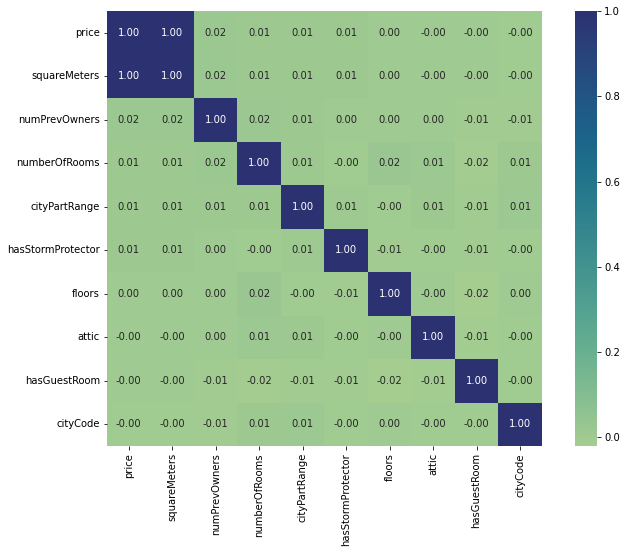

In [ ]:
# price correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
corr_10=corr.loc[cols,cols]

plt.figure(figsize=(12,8))
sns.heatmap(corr_10,annot=True,square=True,fmt='.2f', annot_kws={'size': 10},yticklabels=cols.values, xticklabels=cols.values,cmap='crest')
plt.show()

Text(0.5, 1.0, 'correlation Matrix')

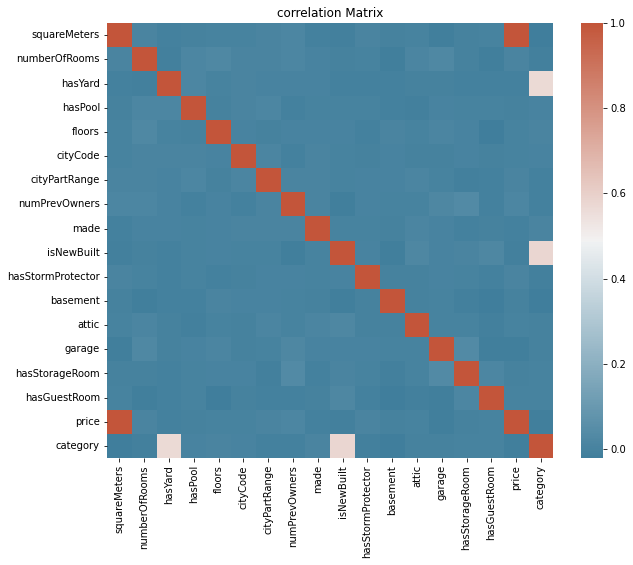

In [ ]:
# draw the correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=False, cmap=cmap)
plt.title('correlation Matrix')

<Axes: xlabel='price', ylabel='Count'>

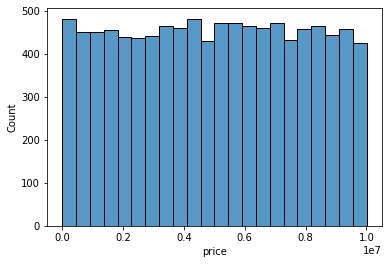

In [ ]:
sns.histplot(df['price'])

In [ ]:
# price count value using mean as threshold

df['cat'] = 0
for i in range(df.shape[0]):
    
    if df['price'][i] > 5000000:
        df['cat'][i] = 1
    else : 
        df['cat'][i] = 0

df['cat'].value_counts()

<ipython-input-78-abcc6c2fbe4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat'][i] = 1
<ipython-input-78-abcc6c2fbe4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat'][i] = 0


1    5021
0    4979
Name: cat, dtype: int64

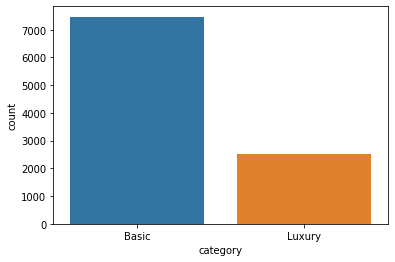

In [ ]:
# category distribution
sns.countplot(x = df['category'])
plt.show()

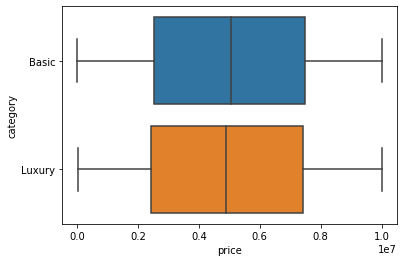

In [ ]:
# price distribution by category
sns.boxplot(data=df, x="price", y="category")
plt.show()

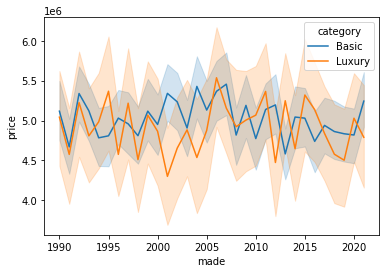

In [ ]:
# price distribution overtime by types
sns.lineplot(data = df,x="made",y ="price",hue="category")
plt.show()

# Modeling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,classification_report
from sklearn import metrics
from sklearn.tree import plot_tree



### Decision tree Calssification

In [ ]:
df1 = df.copy()

In [ ]:
# Split data
X = df1.drop('category', axis = 1)
y = df1['category']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Scalling data
scaler_train= StandardScaler()
scaler_train.fit(X_train)
scaler_test= StandardScaler()
scaler_test.fit(X_test)
X_train_scaled= scaler_train.transform(X_train)
X_test_scaled= scaler_test.transform(X_test)

In [ ]:
# train classification decision tree model
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print("Accuracy score: ", accuracy)
print("Mean Squared Error: ", MSE)

Accuracy score:  0.9963333333333333
Mean Squared Error:  0.0036666666666666666


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.9993333333333333

In [ ]:
grid_search.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [ ]:
# same result as before
tree_model_cv = DecisionTreeClassifier(max_depth=2,min_samples_split =2)
tree_model_cv = tree_model.fit(X_train,y_train)
y_pred1 = tree_model_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
MSE = mean_squared_error(y_test, y_pred1)
print("Accuracy score: ", accuracy)
print("Mean Squared Error: ", MSE)

Accuracy score:  0.9963333333333333
Mean Squared Error:  0.0036666666666666666


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

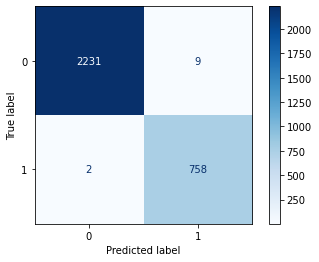

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])

# Configure the display settings
cmd.plot(cmap=plt.cm.Blues, values_format='d')

# Show the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2240
           2       0.99      1.00      0.99       760

    accuracy                           1.00      3000
   macro avg       0.99      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
# draw decision tree
plt.figure(figsize=(100, 80), dpi=150)
plot_tree(tree_model, filled=True, feature_names=X.columns);

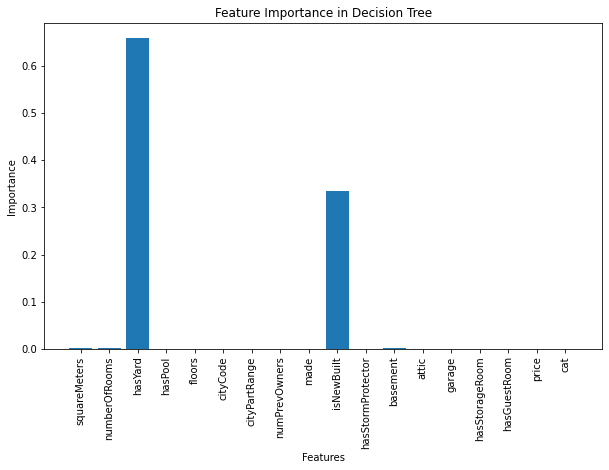

In [ ]:
# feature importance of DecisionTreeClassifier()
plt.figure(figsize=(10,6))
plt.bar(range(len(tree_model.feature_importances_)), tree_model.feature_importances_)
plt.xticks(range(len(tree_model.feature_importances_)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

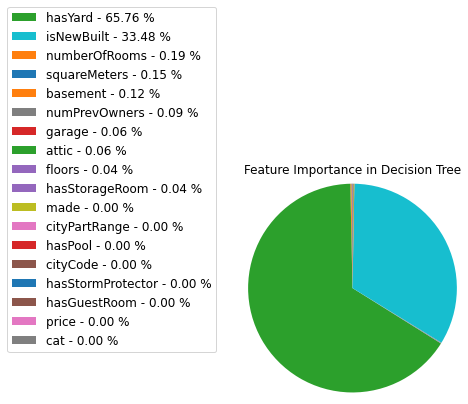

In [ ]:
x = X.columns
y = tree_model.feature_importances_
# colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Feature Importance in Decision Tree')
plt.show()


### Decision Tree Regression

In [ ]:
df2 = df.copy()

In [ ]:
X = df2.drop('price', axis = 1)
y = df2['price']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

<ipython-input-95-5079fcf6e475>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)
<ipython-input-95-5079fcf6e475>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)


<Axes: xlabel='price', ylabel='Density'>

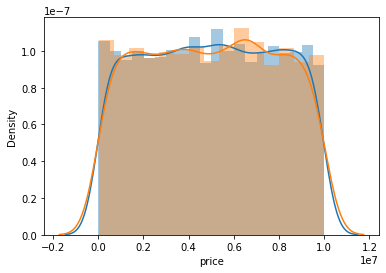

In [ ]:
sns.distplot(y_train)
sns.distplot(y_test)

In [ ]:
scaler_train= StandardScaler()
scaler_train.fit(X_train)
scaler_test= StandardScaler()
scaler_test.fit(X_test)
X_train_scaled= scaler_train.transform(X_train)
X_test_scaled= scaler_test.transform(X_test)

In [ ]:
from sklearn.metrics import r2_score
tree_model = DecisionTreeRegressor()
tree_model = tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

r2 score: 0.9999960258049935


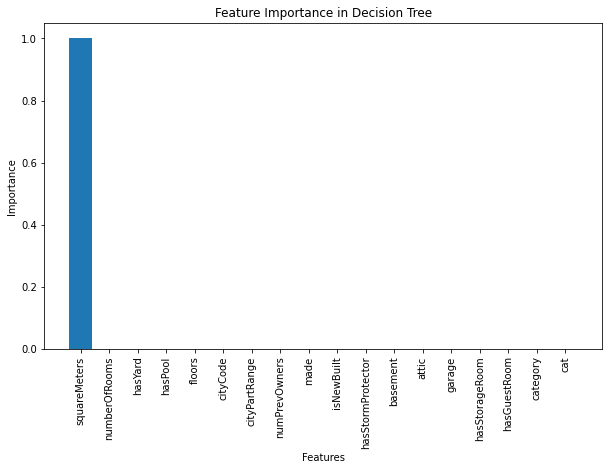

In [ ]:
#feature importance of DecisionTreeRegressor()
plt.figure(figsize=(10,6))
plt.bar(range(len(tree_model.feature_importances_)), tree_model.feature_importances_)
plt.xticks(range(len(tree_model.feature_importances_)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

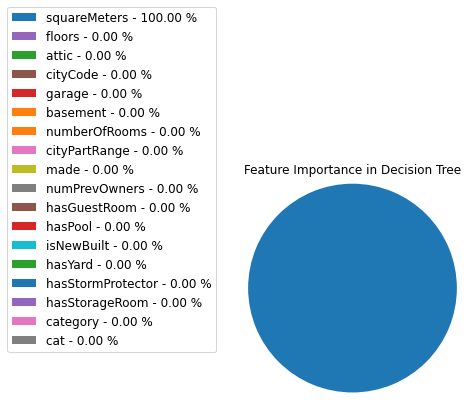

In [ ]:
# Because price is highly correlated with squaremeters (in this dataset)

x = X.columns
y = tree_model.feature_importances_
# colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Feature Importance in Decision Tree')
plt.show()
